In [ ]:
!pip install neuralprophet

In [ ]:
import pandas as pd
import numpy as np
from neuralprophet import NeuralProphet
from matplotlib import pyplot as plt

In [ ]:
df = pd.read_csv('/content/bangalore 2020-06-24 to 2022-06-24.csv')
df.tail()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
726,bangalore,2022-06-20,28.8,21.0,24.0,31.1,21.0,24.4,20.9,84.2,...,16.0,7,10.0,2022-06-20T05:54:34,2022-06-20T18:47:53,0.72,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"43296099999,VOBG,42705699999,VOBL,43302599999,..."
727,bangalore,2022-06-21,28.0,20.9,23.5,29.6,20.9,23.8,20.4,83.7,...,19.6,7,10.0,2022-06-21T05:54:47,2022-06-21T18:48:06,0.77,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"43296099999,VOBG,42705699999,VOBL,43302599999,..."
728,bangalore,2022-06-22,26.0,20.0,22.9,26.0,20.0,22.9,20.3,85.4,...,18.9,9,10.0,2022-06-22T05:55:00,2022-06-22T18:48:19,0.82,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"43296099999,VOBG,42705699999,VOBL,43295099999"
729,bangalore,2022-06-23,26.0,20.0,23.1,26.0,20.0,23.1,20.3,84.5,...,21.5,8,10.0,2022-06-23T05:55:13,2022-06-23T18:48:31,0.87,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"VOBG,VOBL"
730,bangalore,2022-06-24,29.0,20.9,24.5,30.7,20.9,25.0,19.8,76.6,...,22.5,8,10.0,2022-06-24T05:55:27,2022-06-24T18:48:43,0.91,"Rain, Partially cloudy",Partly cloudy throughout the day with early mo...,rain,"VOBG,VOBL"


In [ ]:
df.datetime.unique()

array(['2020-06-24', '2020-06-25', '2020-06-26', '2020-06-27',
       '2020-06-28', '2020-06-29', '2020-06-30', '2020-07-01',
       '2020-07-02', '2020-07-03', '2020-07-04', '2020-07-05',
       '2020-07-06', '2020-07-07', '2020-07-08', '2020-07-09',
       '2020-07-10', '2020-07-11', '2020-07-12', '2020-07-13',
       '2020-07-14', '2020-07-15', '2020-07-16', '2020-07-17',
       '2020-07-18', '2020-07-19', '2020-07-20', '2020-07-21',
       '2020-07-22', '2020-07-23', '2020-07-24', '2020-07-25',
       '2020-07-26', '2020-07-27', '2020-07-28', '2020-07-29',
       '2020-07-30', '2020-07-31', '2020-08-01', '2020-08-02',
       '2020-08-03', '2020-08-04', '2020-08-05', '2020-08-06',
       '2020-08-07', '2020-08-08', '2020-08-09', '2020-08-10',
       '2020-08-11', '2020-08-12', '2020-08-13', '2020-08-14',
       '2020-08-15', '2020-08-16', '2020-08-17', '2020-08-18',
       '2020-08-19', '2020-08-20', '2020-08-21', '2020-08-22',
       '2020-08-23', '2020-08-24', '2020-08-25', '2020-

In [ ]:
df.columns

Index(['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations'],
      dtype='object')

In [ ]:
df.dtypes

name                 object
datetime             object
tempmax             float64
tempmin             float64
temp                float64
feelslikemax        float64
feelslikemin        float64
feelslike           float64
dew                 float64
humidity            float64
precip              float64
precipprob            int64
precipcover         float64
preciptype           object
snow                float64
snowdepth           float64
windgust            float64
windspeed           float64
winddir             float64
sealevelpressure    float64
cloudcover          float64
visibility          float64
solarradiation      float64
solarenergy         float64
uvindex               int64
severerisk          float64
sunrise              object
sunset               object
moonphase           float64
conditions           object
description          object
icon                 object
stations             object
dtype: object

In [ ]:
df ['datetime'] = pd.to_datetime(df ['datetime'])
df.tail()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
726,bangalore,2022-06-20,28.8,21.0,24.0,31.1,21.0,24.4,20.9,84.2,...,16.0,7,10.0,2022-06-20T05:54:34,2022-06-20T18:47:53,0.72,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"43296099999,VOBG,42705699999,VOBL,43302599999,..."
727,bangalore,2022-06-21,28.0,20.9,23.5,29.6,20.9,23.8,20.4,83.7,...,19.6,7,10.0,2022-06-21T05:54:47,2022-06-21T18:48:06,0.77,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"43296099999,VOBG,42705699999,VOBL,43302599999,..."
728,bangalore,2022-06-22,26.0,20.0,22.9,26.0,20.0,22.9,20.3,85.4,...,18.9,9,10.0,2022-06-22T05:55:00,2022-06-22T18:48:19,0.82,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"43296099999,VOBG,42705699999,VOBL,43295099999"
729,bangalore,2022-06-23,26.0,20.0,23.1,26.0,20.0,23.1,20.3,84.5,...,21.5,8,10.0,2022-06-23T05:55:13,2022-06-23T18:48:31,0.87,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"VOBG,VOBL"
730,bangalore,2022-06-24,29.0,20.9,24.5,30.7,20.9,25.0,19.8,76.6,...,22.5,8,10.0,2022-06-24T05:55:27,2022-06-24T18:48:43,0.91,"Rain, Partially cloudy",Partly cloudy throughout the day with early mo...,rain,"VOBG,VOBL"


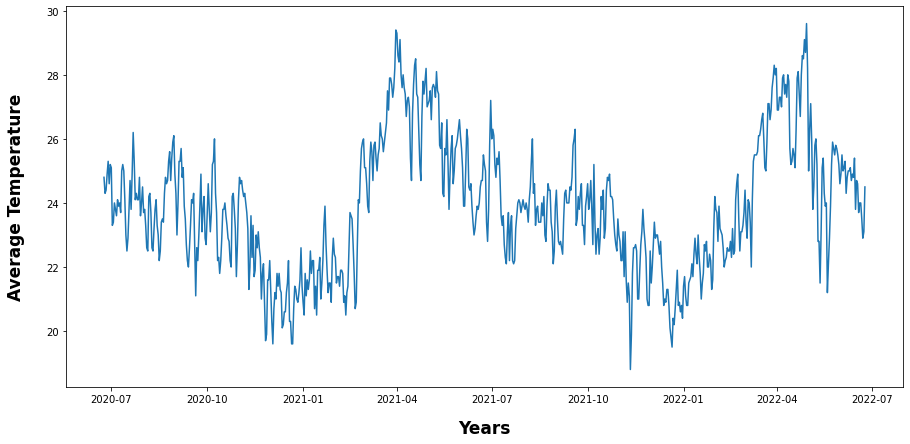

In [ ]:
plt.rcParams["figure.figsize"] = [15, 7]
plt.plot(df ['datetime'], df ['temp'])
plt.xlabel('Years', fontweight='bold', color = 'black', fontsize='17', horizontalalignment='center', labelpad=15)
plt.ylabel('Average Temperature', fontweight='bold', color = 'black', fontsize='17', verticalalignment='center', labelpad=30)
plt.show()

In [ ]:
new_column = df[['datetime', 'temp']] 
new_column.dropna(inplace=True)
new_column.columns = ['ds', 'y'] 
new_column.tail()

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)



,ds,y
726,2022-06-20,24.0
727,2022-06-21,23.5
728,2022-06-22,22.9
729,2022-06-23,23.1
730,2022-06-24,24.5


In [ ]:
n = NeuralProphet()
model = n.fit(new_column, freq='D')

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.863% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 215


  0%|          | 0/122 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.77E-01, min: 3.51E-01


  0%|          | 0/122 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.77E-01, min: 4.17E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 1.46E-01
Epoch[215/215]: 100%|██████████| 215/215 [00:33<00:00,  6.47it/s, SmoothL1Loss=0.0064, MAE=0.791, RMSE=0.982, RegLoss=0]


In [ ]:
future = n.make_future_dataframe(new_column, periods=30)
forecast = n.predict(future)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.863% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 96.667% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 96.667% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


In [ ]:
forecast = forecast[['ds', 'yhat1']] 
forecast.columns = ['Date', 'AvgTemp'] 
forecast.tail()

,Date,AvgTemp
25,2022-07-20,22.517067
26,2022-07-21,22.336926
27,2022-07-22,22.393480
28,2022-07-23,22.356319
29,2022-07-24,22.331221


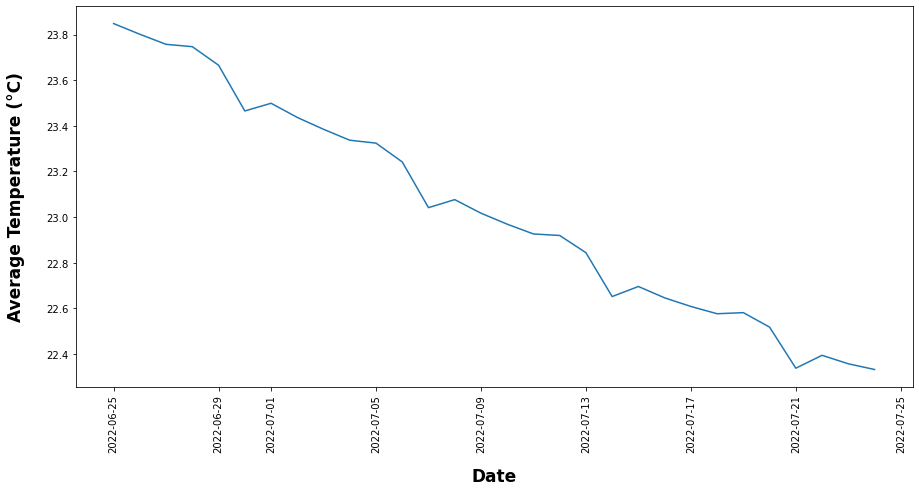

In [ ]:
plt.rcParams["figure.figsize"] = [15, 7]
plt.plot(forecast['Date'], forecast['AvgTemp'])
plt.xlabel('Date', fontweight='bold', color = 'black', fontsize='17', horizontalalignment='center', labelpad=15)
plt.xticks(rotation = 90)
plt.ylabel('Average Temperature (°C)', fontweight='bold', color = 'black', fontsize='17', verticalalignment='center', labelpad=30)
plt.show()